In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
df = pd.read_excel('Changyeong_kim_Computer_Component_Recommendation_RerpGrid.xlsx')
df.drop(['Ideal','Non Ideal'], axis=1)

,1,Amazon,Ebays,Danawa,PCPARTPICKER,7
0,Sufficient filter,4,4,3,1,No filter
1,Reasonable price,4,4,2,1,Expensive price
2,Various of brands,3,3,2,1,Limited brands
3,Detailed specification,3,3,3,1,No specification
4,Good reviews,2,3,6,1,Bad reviews
5,Large amount of reviews,1,1,4,6,Limited amount of reviews
6,In stock,5,5,1,1,Out of stock
7,Friendly UI,2,3,4,4,Unfriendly UI
8,Fast response time,1,1,1,1,Slow response time
9,Useful search result,3,3,5,1,Useless search result


### Euclidean Distance - Element

In [3]:
data = df.loc[:,'Amazon':'PCPARTPICKER']
distances = euclidean_distances(data.T)
distance_df = pd.DataFrame(
    distances,
    index = data.columns,
    columns = data.columns
    )
distance_df

,Amazon,Ebays,Danawa,PCPARTPICKER
Amazon,0.000000,1.414214,8.000000,10.049876
Ebays,1.414214,0.000000,7.348469,10.049876
Danawa,8.000000,7.348469,0.000000,7.681146
PCPARTPICKER,10.049876,10.049876,7.681146,0.000000


### Euclidean Distance - Construct

In [4]:
data = df.loc[:,'Amazon':'PCPARTPICKER']
distances = euclidean_distances(data)
distance_df = pd.DataFrame(
    distances,
    index = df[1].values,
    columns = df[1].values
    )
distance_df

,Sufficient filter,Reasonable price,Various of brands,Detailed specification,Good reviews,Large amount of reviews,In stock,Friendly UI,Fast response time,Useful search result,Compatibility check
Sufficient filter,0.000000,1.000000,1.732051,1.414214,3.741657,6.633250,2.449490,3.872983,4.690416,2.449490,2.828427
Reasonable price,1.000000,0.000000,1.414214,1.732051,4.582576,6.855655,1.732051,4.242641,4.358899,3.316625,3.000000
Various of brands,1.732051,1.414214,0.000000,1.000000,4.123106,6.082763,3.000000,3.741657,3.000000,3.000000,4.358899
Detailed specification,1.414214,1.732051,1.000000,0.000000,3.162278,5.830952,3.464102,3.316625,3.464102,2.000000,4.242641
Good reviews,3.741657,4.582576,4.123106,3.162278,0.000000,5.830952,6.164414,3.605551,5.477226,1.414214,5.830952
Large amount of reviews,6.633250,6.855655,6.082763,5.830952,5.830952,0.000000,8.124038,3.000000,5.830952,5.830952,8.717798
In stock,2.449490,1.732051,3.000000,3.464102,6.164414,8.124038,0.000000,5.567764,5.656854,4.898979,2.449490
Friendly UI,3.872983,4.242641,3.741657,3.316625,3.605551,3.000000,5.567764,0.000000,4.795832,3.316625,5.916080
Fast response time,4.690416,4.358899,3.000000,3.464102,5.477226,5.830952,5.656854,4.795832,0.000000,4.898979,7.348469
Useful search result,2.449490,3.316625,3.000000,2.000000,1.414214,5.830952,4.898979,3.316625,4.898979,0.000000,4.690416


### Hierachical Clustering

In [39]:
def clustering(data, x_labels, y_labels, method = 'single', metric = 'euclidean'):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_axes([1.05, 0.1, 0.2, 0.5])  #left여백, bottom여백, height, width
    ax2 = fig.add_axes([0.1, 0.65, 0.4, 0.1])
    axm = fig.add_axes([0.1, 0.1, 0.5, 0.5])   #for the hitmap

    linked = linkage(data.T.values, method=method, metric = metric)
    dendrogram_ = dendrogram(
        linked,
        orientation='top',
        labels=x_labels,
        distance_sort='descending',
        show_leaf_counts=True,
        ax=ax2
        )

    linked = linkage(data.values, method=method, metric = metric)
    dendrogram_ = dendrogram(
        linked,
        orientation='right',
        labels=y_labels,
        distance_sort='descending',
        show_leaf_counts=True,
        ax=ax1
        )
    
    sns.heatmap(
        data,
        annot=True,
        fmt='d',
        ax=axm
    )
    axm.set_yticks([])
    plt.show()

In [40]:
df

,1,Ideal,Non Ideal,Amazon,Ebays,Danawa,PCPARTPICKER,7
0,Sufficient filter,1,7,4,4,3,1,No filter
1,Reasonable price,1,7,4,4,2,1,Expensive price
2,Various of brands,1,7,3,3,2,1,Limited brands
3,Detailed specification,1,7,3,3,3,1,No specification
4,Good reviews,1,7,2,3,6,1,Bad reviews
5,Large amount of reviews,1,7,1,1,4,6,Limited amount of reviews
6,In stock,1,7,5,5,1,1,Out of stock
7,Friendly UI,1,7,2,3,4,4,Unfriendly UI
8,Fast response time,1,7,1,1,1,1,Slow response time
9,Useful search result,1,7,3,3,5,1,Useless search result


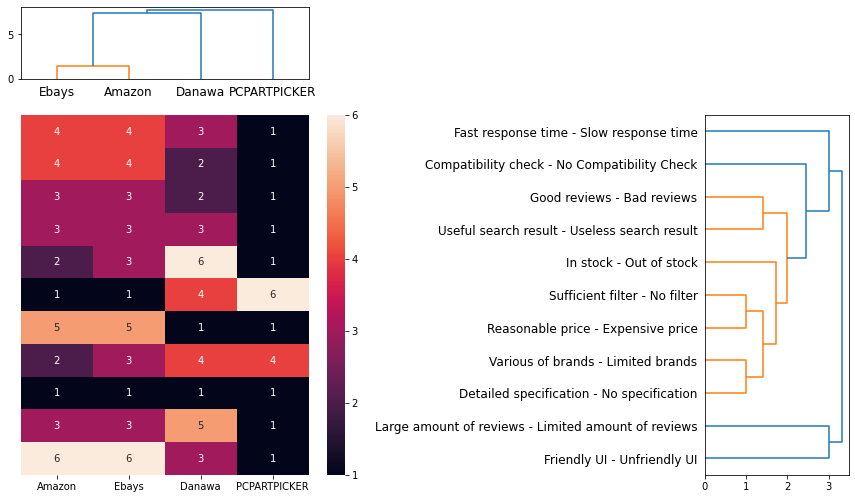

In [41]:
data = df.loc[:,'Amazon':'PCPARTPICKER']
clustering(
    data,
    x_labels = data.columns,
    y_labels = (df[1] + ' - ' + df[7]).values
    )

### PCA

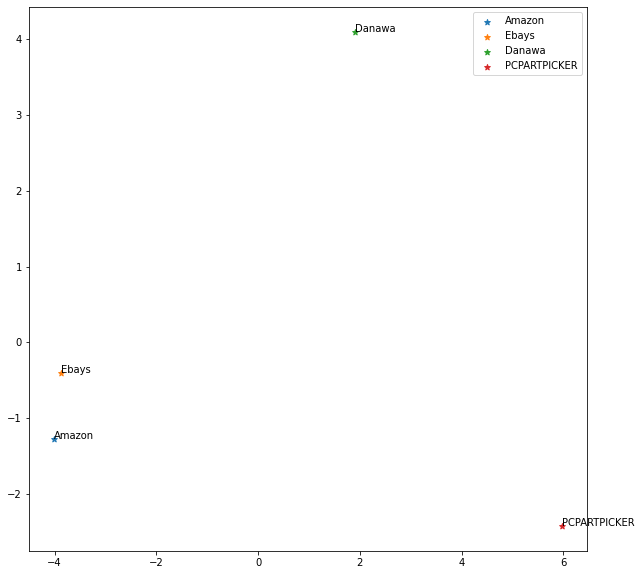

In [8]:
from sklearn.decomposition import PCA
plt.figure(figsize=(10,10))
pca = PCA(n_components=2)
scaled_data = pca.fit_transform(data.T)
for target, x in zip(data.columns, scaled_data):
    plt.scatter(x = x[0], y = x[1], marker='*', label = target)
    plt.text(x[0], x[1], target)

plt.legend()
plt.show()

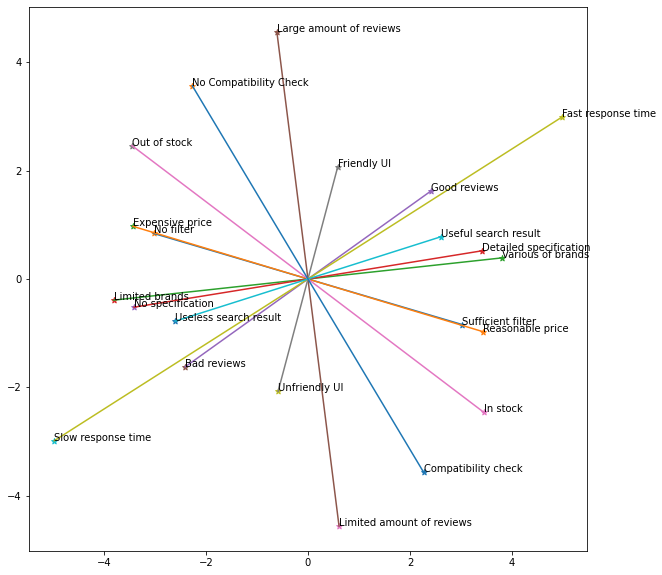

In [33]:

plt.figure(figsize=(10,10))
pca = PCA(n_components=2)
scaled_data = pca.fit_transform(pd.concat([data,8-data]))
targets = pd.concat([df[1],df[7]]).values
for target, x in zip(targets, scaled_data):
    plt.scatter(x = x[0], y = x[1], marker='*', label = target)
    plt.text(x[0], x[1], target)

for x, x_ in zip(scaled_data[:int(len(scaled_data)/2)], scaled_data[int(len(scaled_data)/2):]):
    plt.plot([x[0],x_[0]],[x[1],x_[1]])


# plt.legend()
plt.show()